In [5]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [6]:
# creates synthetic cluster data. K is number of clusters, N is the number of points per cluster
# mean_b is used to generate means for the multivaraiate data. the covriance matrix is fixed for all the clusters.
def create_random_clusters(K =3, N = 30, mean_b = 6):
    return np.concatenate([npr.multivariate_normal(mean = [npr.randint(-mean_b,mean_b),npr.randint(-mean_b,mean_b)],
                                                   cov = [[0.5,0],[0,0.5]], size = N) for kk in range(K)])

In [20]:
%matplotlib notebook

X = create_random_clusters(K =3, N = 30, mean_b = 6)

# reshape centroids for broadcasting operation.
def centroids_reshaped(centroids):
    return centroids.T.reshape(1,-1,K)
# this function calculates the closest centroids for each point, calculate new centroids and the objective function with new centroids
def objective_function(X, centroids):
    closest_centroid = np.argmin(np.linalg.norm(X[...,None]-centroids_reshaped(centroids), axis = 1),axis = 1)
    centroids = np.array([X[closest_centroid == kk].mean(axis = 0) for kk in range(K)])
    J = ((X-centroids[closest_centroid])**2).mean()
    return J, centroids, closest_centroid

K = 3
tol = 1E-4
solutions = []
number_of_random_centroids_picking = 10
for i in range(number_of_random_centroids_picking):
    # pick K random centroids
    centroids = X[(np.random.choice(len(X), K, replace = False))]
    J = 0
    J_1,centroids, closest_centroid = assignment(X,centroids) 
    while (abs(J-J_1) >= tol):
        J = J_1
        J_1,centroids, closest_centroid = assignment(X,centroids)
    solutions.append([J_1, centroids, closest_centroid])

optimized_solution = min(solutions, key = lambda x: x[0])
J, optmized_centroids, optimized_closest_centroid  = optimized_solution
print(J, optmized_centroids, optimized_closest_centroid)



0.505631630421926 [[-3.89163571 -5.86729811]
 [ 0.02633991 -1.0973789 ]
 [ 4.02467547 -5.74119087]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<IPython.core.display.Javascript object>


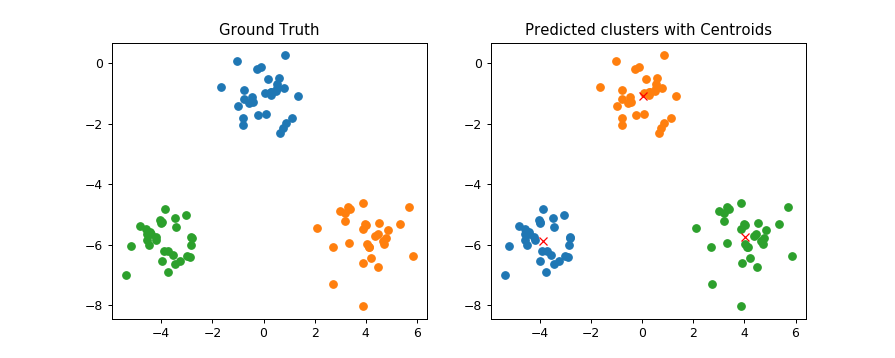

In [21]:
# prepare the figure object and plot the points
fig,ax = plt.subplots(1,2, figsize = (10,4))

ax[0].set_title('Ground Truth')
[ax[0].plot(*X_split.T,'o' )for X_split in np.split(X,K)]

ax[1].set_title('Predicted clusters with Centroids')
for kk in range(K):
    ax[1].plot(*X[optimized_closest_centroid == kk].T,  'o')   
ax[1].plot(optmized_centroids[:,0], optmized_centroids[:,1], 'rx')